<h1><b>Modelo 01</b></h1>
<h4>Desarrollado por: Cristian Gonzaga López &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  A01745134 </h4>

## Librerias

In [ ]:
from pathlib import Path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
import pandas as pd

import random
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split 

## Método

### Lectura de Datos.

Dado que era necesario importar nuestras imágenes, se decidió hacer dicho proceso en otro *notebook* de *Google Colaboratory* para no tener un gran costo computacional en el presente archivo. 

Este se llama **Lectura de Datos** y encuentra en el siguiente enlace: https://colab.research.google.com/drive/1ECadGdtapWtiVEgds8kzr9WVVdsOQqb_?usp=sharing

En primer lugar, es necesario importar los datos.

In [ ]:
# Montar Drive en Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lectura de datos.
root = '/content/drive/Shareddrives/Cleto_Gonzaga/'

train_images = np.load(root + 'train_images.npy') # Obtener los datos (imágenes) de entrenamiento.
test_images = np.load(root + 'test_images.npy') # Obtener los datos (imágenes) de prueba.

train_labels = np.load(root + 'train_labels.npy') # Obtener las etiquetas (labels) de los datos de entrenamiento.
test_labels = np.load(root + 'test_labels.npy') # Obtener las etiquetas (labels) de los datos de prueba.

In [ ]:
# Imprimir cuántos datos se tienen en cada conjunto de datos.
print("Número total de datos:\n",
      "Entrenamiento",train_images.shape[0],"\n",
      "Prueba",test_images.shape[0],"\n")

# Imprimir las dimensiones de nuestras imágenes.
print("Dimensiones de los datos:\n",
      "Entrenamiento:",train_images.shape[1:],"\n",
      "Prueba:",test_images.shape[1:],"\n")

Número total de datos:
 Entrenamiento 9910 
 Prueba 1100 

Dimensiones de los datos:
 Entrenamiento: (128, 128, 3) 
 Prueba: (128, 128, 3) 



Apreciando así que se tienen 9910 y 1100 datos de imágenes para los datos entrenamiento y de prueba, respectivamente.

Dichas cifras corresponden al número de imágenes total, dado que los datos de entrenamiento constaban de 11 subcarpetas (cada una representando una clase) con apróximadamente 900 imágenes cada uno y los datos de prueba también eran 11 subcarpetas, pero cada una con 100 imágenes (en total 1100).

Además, dichos datos están representados como una matriz de 128 x 128 y tienen escala de colores.

Por último, es pertinente recordar que las clases de nuestro conjunto de datos son: 

1. apple_pie.
2. cheesecake.
3. chicken_curry.
4. french_fries. 
5. fried_rice. 
6. hamburger. 
7. hot_dog.
8. ice_cream. 
9. omelette. 
10. pizza. 
11. sushi.

Dado que consideramos nuestros datos de entrenamiento y prueba no están balanceado de manera adecuada, puesto que están divididos en 90 - 10, se consideró pertinente rehacer dicha división, pero ahora a 70 - 30 para los datos de entrenamiento y prueba, respectivamente.

In [ ]:
images = np.concatenate([train_images,test_images]) # Concatenar los datos divididos en un solo conjunto.
labels = np.concatenate([train_labels,test_labels]) # Concatenar las etiquetas divididas en un solo conjunto.

# Dividir los datos en conjuntos de entrenamiento y prueba en una proporción 70 - 30.
train_images, test_images, train_labels, test_labels = train_test_split(images,labels,test_size=0.3,random_state=123) # Definir semilla para reproducibilidad.

In [ ]:
# Imprimir cuántos datos se tienen en cada conjunto de datos.
print("Número total de datos:\n",
      "Entrenamiento",train_images.shape[0],"\n",
      "Prueba",test_images.shape[0],"\n")

# Imprimir las dimensiones de nuestras imágenes.
print("Dimensiones de los datos:\n",
      "Entrenamiento:",train_images.shape[1:],"\n",
      "Prueba:",test_images.shape[1:],"\n")

Número total de datos:
 Entrenamiento 7707 
 Prueba 3303 

Dimensiones de los datos:
 Entrenamiento: (128, 128, 3) 
 Prueba: (128, 128, 3) 



Obteniendo así una división más balanceada.

#### Implementación de modelo.

In [ ]:
# Build the Sequential convolutional neural network model

# Definir desde el constructor.
model = Sequential([
    # Capa convolucional 2D con un kernel de 3 x 3 y 32 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro).
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128,128,3)),
    MaxPooling2D(2),
    
    # Capa convolucional 2D con un kernel de 3 x 3 y 64 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro). 
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2),

    # Capa convolucional 2D con un kernel de 3 x 3 y 128 filtros. Función de activación ReLu. Padding igual a same - hace que el borde sea de puros ceros (color negro).
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2),
    
    # Capa plana para obtener una entrada unidimensional.
    Flatten(),

    # Capa densa de 128 neuronas. Función de activación relu 
    Dense(128, activation='relu'),
    
    # Capa densa de 128 neuronas. Función de activación relu 
    Dense(128, activation='relu'),

    # Capa densa de 128 neuronas. Función de activación relu 
    Dense(128, activation='relu'),

    # Capa densa de 11 neuronas. Functión de activación softmax.
    Dense(11, activation='softmax')
])

Asimismo, se empleó *Adam* con un learning rate de 0.001 como optimizador, y la métrica para evaluar nuestro modelo será la precisión, mientras que para evaluar la pérdida se usará *sparse categorical crossentropy*.

In [ ]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizador Aman con un learning rate de 0.001
acc = tf.keras.metrics.SparseCategoricalAccuracy() # Precisión de nuestro modelo.

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc]) # Función de pérdida - Sparse categorical crossentropy.

Asimismo, una mejor comprensión de los datos de entrada y de salida del modelo se muestra el siguiente gráfico.

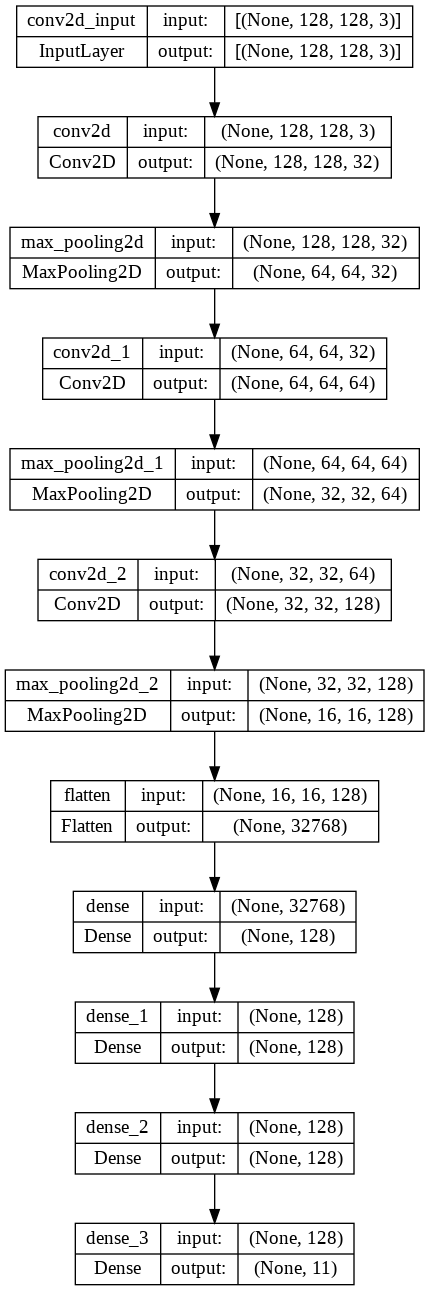

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Asimismo, se definieron las siguientes semillas para reproducibilidad.

In [ ]:
seed = 123
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

Por último decidieron utilizaron 10 *epochs* para el entrenamiento del modelo. Sin embargo, es importante notar que puede ser al final menos *epochs* por el método *Early Stopping*.

In [ ]:
epochs_ = 10
history = model.fit(train_images, train_labels, validation_split=0.1, 
                    batch_size=32, epochs=epochs_)

Epoch 1/10
217/217 [==============================] - 9s 26ms/step - loss: 2.3054 - sparse_categorical_accuracy: 0.1566 - val_loss: 2.2438 - val_sparse_categorical_accuracy: 0.1829
Epoch 2/10
217/217 [==============================] - 5s 22ms/step - loss: 2.1362 - sparse_categorical_accuracy: 0.2411 - val_loss: 2.1309 - val_sparse_categorical_accuracy: 0.2711
Epoch 3/10
217/217 [==============================] - 5s 22ms/step - loss: 2.0029 - sparse_categorical_accuracy: 0.3029 - val_loss: 2.0649 - val_sparse_categorical_accuracy: 0.3048
Epoch 4/10
217/217 [==============================] - 5s 22ms/step - loss: 1.8449 - sparse_categorical_accuracy: 0.3676 - val_loss: 2.0096 - val_sparse_categorical_accuracy: 0.3165
Epoch 5/10
217/217 [==============================] - 5s 22ms/step - loss: 1.5715 - sparse_categorical_accuracy: 0.4717 - val_loss: 2.0562 - val_sparse_categorical_accuracy: 0.3398
Epoch 6/10
217/217 [==============================] - 5s 22ms/step - loss: 1.2085 - sparse_cate

#### Evaluación del modelo.

Primero se gráficarán los **valores de pérdida** de los datos de entrenamiento y de validación en cada ***epoch***

In [ ]:
# Convertir a dataframe los resultados de los datos de entrenamiento y de validación.
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,2.305413,0.156574,2.243769,0.182879
1,2.136230,0.241061,2.130898,0.271077
2,2.002946,0.302912,2.064886,0.304799
3,1.844890,0.367647,2.009550,0.316472
4,1.571486,0.471742,2.056162,0.339818
5,1.208474,0.588091,2.261917,0.312581
6,0.785730,0.745675,2.595992,0.325551
7,0.445707,0.852941,3.636958,0.304799
8,0.255314,0.918253,4.678904,0.300908
9,0.203248,0.931805,4.509823,0.316472


In [ ]:
# Elegir estilo whitegrid de seaborn para las posteriores visualizaciones.
sns.set(style="whitegrid")

<Figure size 864x432 with 0 Axes>

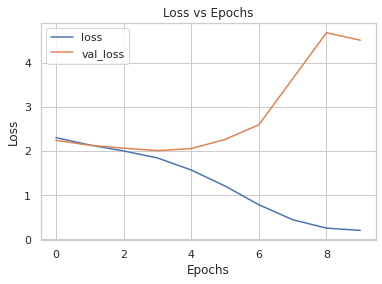

In [ ]:
# Gráfica las pérdidas del modelo.
plt.figure(figsize=(12,6))
loss_plot = df.plot(y=["loss", "val_loss"], title = "Loss vs Epochs", legend=True)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

Asimismo, se graficarán la **precisión (accuracy)** de los datos de entrenamiento y de validación en cada ***epoch***.

<Figure size 864x432 with 0 Axes>

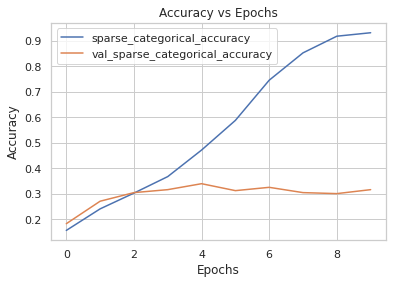

In [ ]:
# Gráficar los valores de precisión del modelo.
plt.figure(figsize=(12,6))
acc_plot = df.plot(y=["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"], 
                   title="Accuracy vs Epochs", legend=True)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

De las curvas de aprendizaje, se aprecia que el modelo está haciendo un sobreajuste. En consecuencia, el modelo no tiene 95% de precisión, sino que donde parecen estar más cercanas los resultados de los datos de entrenamiento y de validación es en apróximadamente el 30% de precisión. De tal modo que se procederá a corroborar su precisión con los datos de prueba.

In [ ]:
# Evaluar el modelo.
model.evaluate(test_images,test_labels)

104/104 [==============================] - 2s 15ms/step - loss: 4.3105 - sparse_categorical_accuracy: 0.3212


[4.310495376586914, 0.3212231397628784]

Así, se rectifica que la verdad precisión del modelo es aproximádamente del 30%, siendo dicho porcentaje un valor muy inferior. Sin embargo, es pertinente analizar la precisión que tuvo para cada de las clases.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
target_names_ = ['apple_pie', 'cheesecake', 'chicken_curry', 'french_fries', 
          'fried_rice', 'hamburger', 'hot_dog', 'ice_cream', 'omelette', 'pizza','sushi']

print("Classification Report\n",classification_report(test_labels,y_pred_classes,target_names=target_names_))


104/104 [==============================] - 1s 10ms/step
Classification Report
                precision    recall  f1-score   support

    apple_pie       0.23      0.24      0.24       304
   cheesecake       0.49      0.37      0.42       300
chicken_curry       0.36      0.31      0.33       315
 french_fries       0.40      0.27      0.32       313
   fried_rice       0.37      0.38      0.37       297
    hamburger       0.27      0.28      0.27       290
      hot_dog       0.29      0.22      0.25       321
    ice_cream       0.36      0.31      0.33       304
     omelette       0.22      0.31      0.26       304
        pizza       0.34      0.62      0.44       285
        sushi       0.28      0.25      0.27       270

     accuracy                           0.32      3303
    macro avg       0.33      0.32      0.32      3303
 weighted avg       0.33      0.32      0.32      3303



*Cheesake* fue la clase que tuvo mayor precisión con un 49%, mientras que *omelette* fue la que peor desempeño tuvo (apenas un 22% de precisión). De tal modo que el modelo no es adecuado y requiere multiples mejoras.

Luego, se decidió corroborar la precisión del modelo al visualizar cómo clasificó cada clase y cuál era su categoría real.

In [ ]:
def prediction(pred,labels):
  """ Gráfica las probabilidades de que una imagen sea una categoría en específico.

  args:
    pred: Valores de predicción del modelo de que sea una categoría en particular.
    labels: Etiquetas de sus valores reales.
  """
  # Crear un dataframe con las probabilidades para cada categoría.
  df = pd.DataFrame(pred, columns=labels)
  df = df.T.reset_index()
  df.columns = ['labels','values']
  df = df.sort_values(by='values',ascending=False)

  sns.set(style="whitegrid")
  plt.figure(figsize=(12,6))

  # Gráficos de barras con la respectiva probabilidad de cada categoría.
  ax = sns.barplot(data=df, x="labels",y="values")

  # Bucle para mostrar el valor de su probabilidad encima de cada barra.
  for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.4f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center")
    
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
# Lista de las clases en el conjunto de datos.
clases = ['apple_pie', 'cheesecake', 'chicken_curry', 'french_fries', 
          'fried_rice', 'hamburger', 'hot_dog', 'ice_cream', 'omelette', 'pizza','sushi']

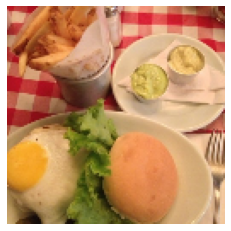

Label: hamburger
Model: hamburger


In [ ]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]

plt.axis('off')
plt.imshow(test_image)
plt.show()
print(f"Label: {clases[test_labels[random_inx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...],verbose=0) # Agregar una dimensión, porque el modelo necesita un arreglo cuadrimensional.
print("Model:", clases[np.argmax(pred)])

Además, para una mejor comprensión del algoritmo, se visualizaron las probabilidades de que fuera cada categoría.

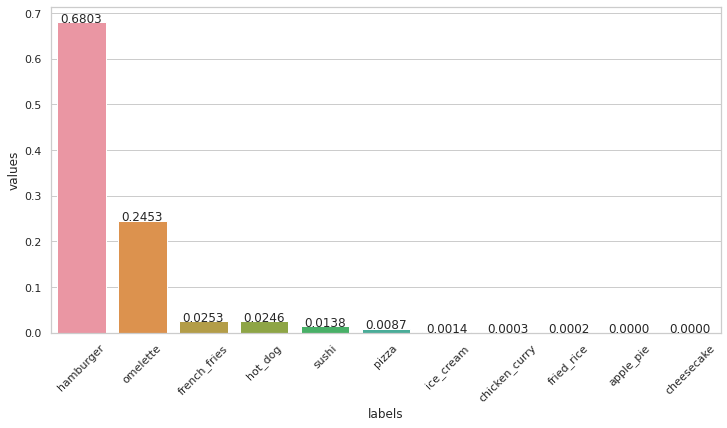

In [ ]:
prediction(pred,clases)

Una imagen que refiere a una hamburguesa fue clasificada como french_fries. El modelo determinó que la probabilidad de que fuera hamburguer era del 68.03%, omelette del 24.53% y french_fries 2.53%. Es decir, en este caso indicó correctamente que era una hamburguesa.

Por último, se repitió lo descrito previamente para otras diez imágenes aleatorias.

---------------------------------------------------------------------------------------
Imágen 1


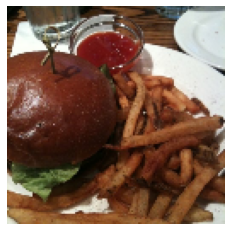

Label: hamburger
Model: hamburger


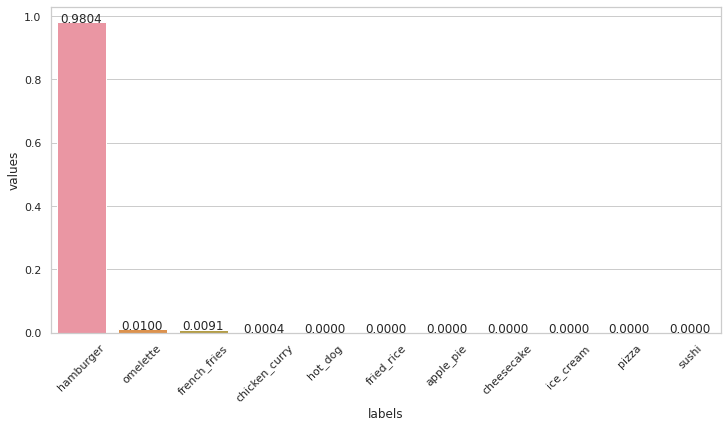

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 2


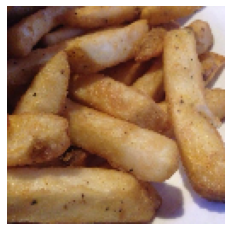

Label: french_fries
Model: apple_pie


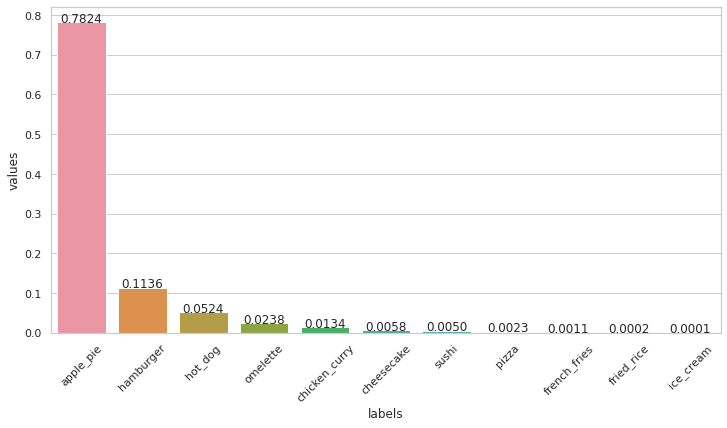

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 3


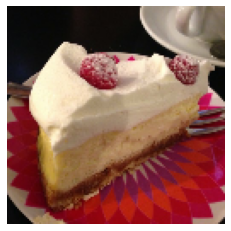

Label: cheesecake
Model: hot_dog


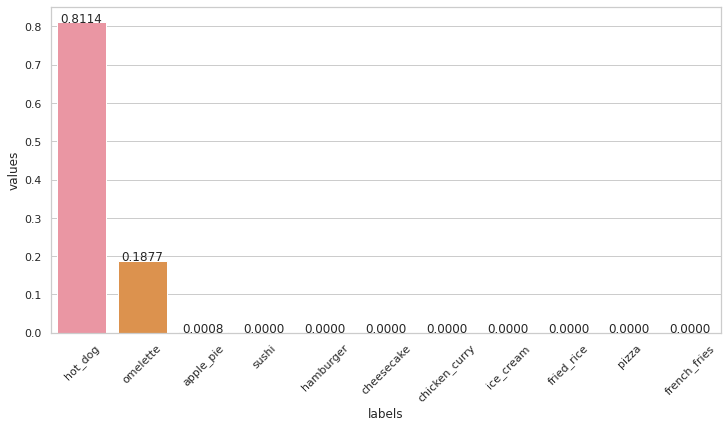

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 4


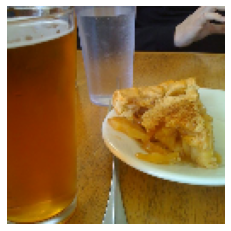

Label: apple_pie
Model: chicken_curry


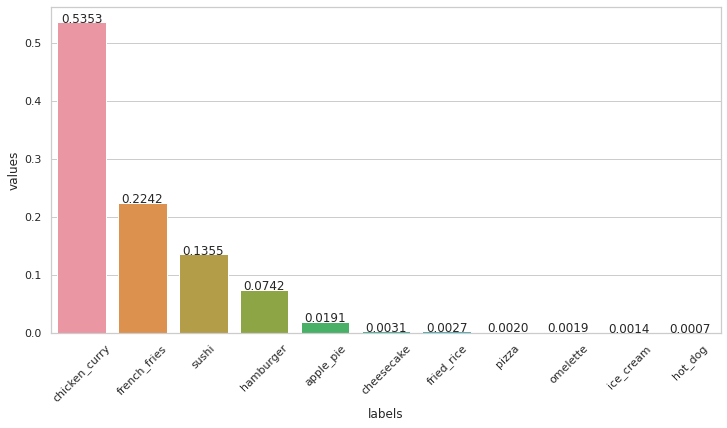

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 5


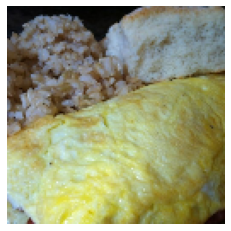

Label: omelette
Model: fried_rice


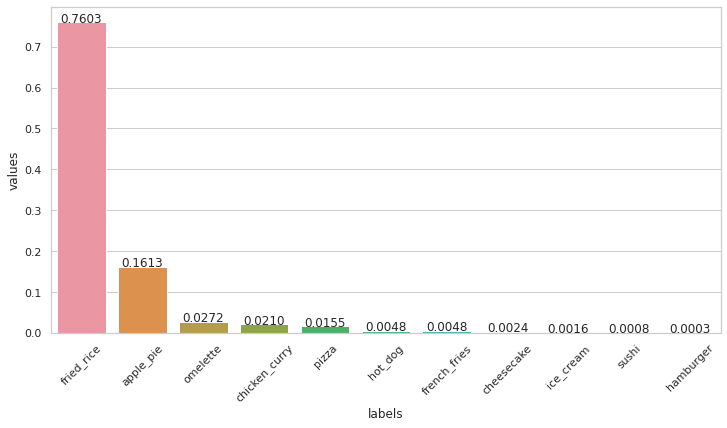

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 6


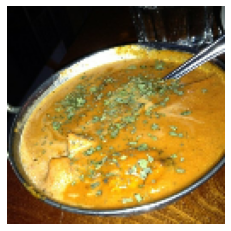

Label: chicken_curry
Model: fried_rice


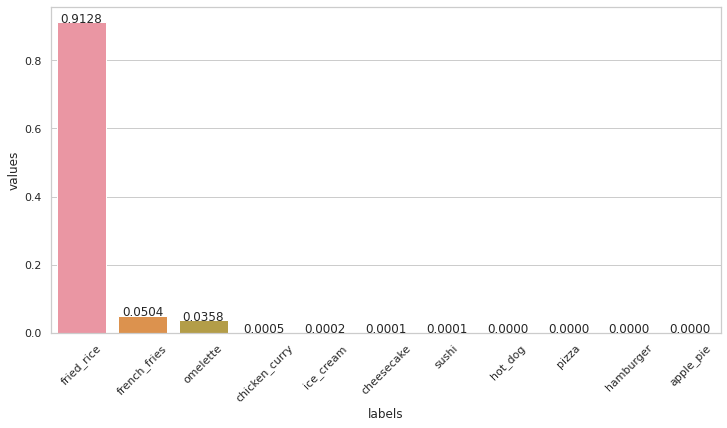

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 7


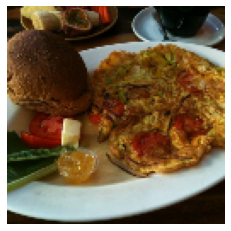

Label: omelette
Model: omelette


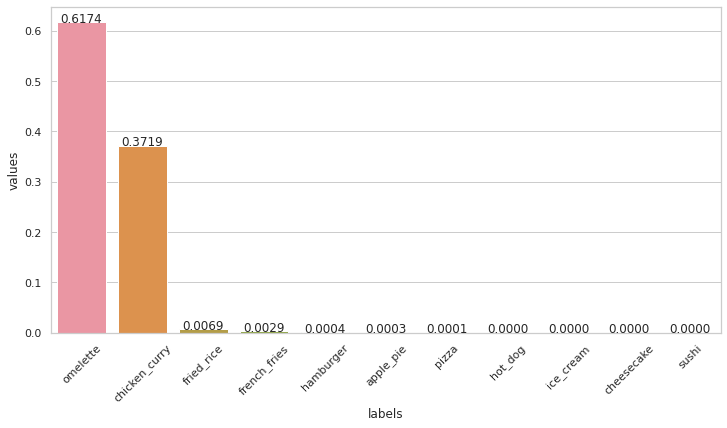

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 8


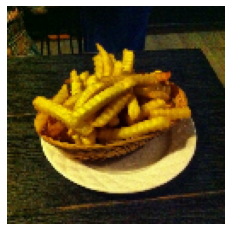

Label: french_fries
Model: french_fries


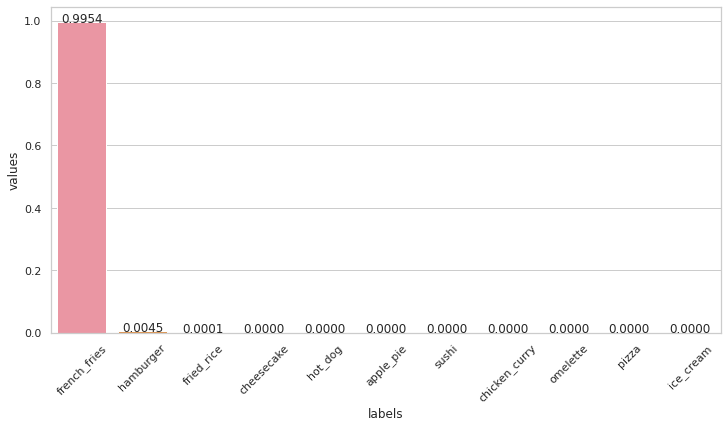

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 9


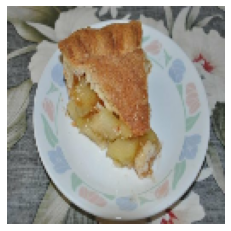

Label: apple_pie
Model: ice_cream


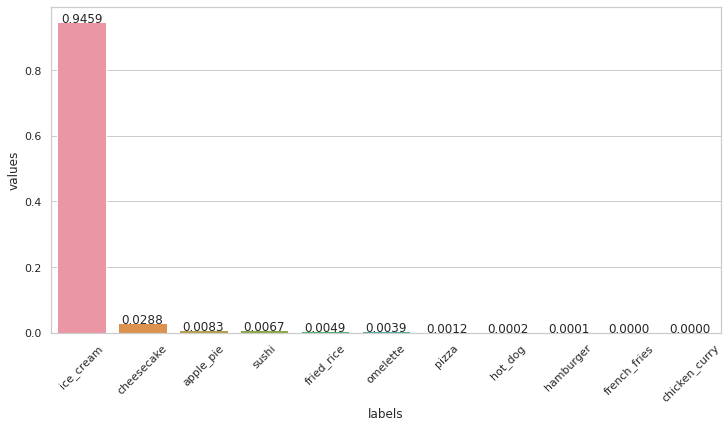

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Imágen 10


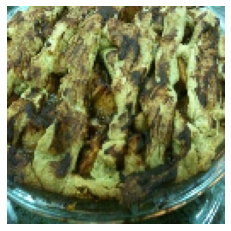

Label: apple_pie
Model: chicken_curry


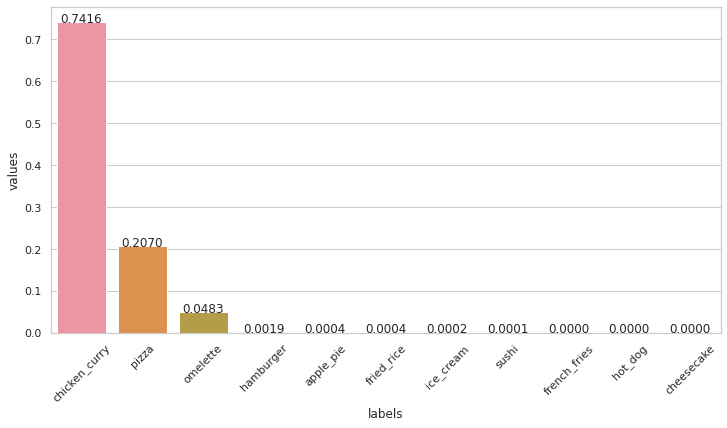

---------------------------------------------------------------------------------------


In [ ]:
for i in range(10):
  print("---------------------------------------------------------------------------------------")
  print("Imágen " + str(i+1))
  random_inx = np.random.choice(test_images.shape[0])
  test_image = test_images[random_inx]
  pred = model.predict(test_image[np.newaxis,...],verbose=0) # Get the model predictions

  # Gráficar la categoría verdadera y la predecida
  plt.axis('off')
  plt.imshow(test_image)
  plt.show()

  print(f"Label: {clases[test_labels[random_inx]]}")
  print("Model:", clases[np.argmax(pred)])

  # Gráfico de barras de las probabilidades empleadas para la predicción.
  prediction(pred,clases)
  print("---------------------------------------------------------------------------------------")

De las diez imágenes, clasificó correctamente la primera, séptima y octava imagen. Denotando así que no es un modelo recomendable a utilizar y requiere mejoras significativas.

## Conclusiones

El modelo es malo. Muestra un claro sobreajuste y la precisión real del modelo es de apróximadamente del treinta porciento. Dicho porcentaje no es significativo en una aplicación de la vida real, dado que el modelo no brinda ninguna seguridad en su cometido de clasficación. De tal modo que se requieren múltiples mejoras, por ejemplo, implementar técnicas como Dropout, BatchNormalization, Data Augmentation o Early Stopping para lidiar con el sobreajuste. Asimismo, podría intentarse añadir o eliminar capas en el modelo para mejorar la precisión, así como aumentar el número de épocas. Esto requerirá múltiples pruebas y, probablemente, un mayor costo computacional, pero nos ayudará a lidiar con el sobreajuste y también a aumentar nuestra precisión.